# Реализация игры Жизнь с дополнительными условиями

In [31]:
import matplotlib.pyplot as plt
import networkx as nx
import random

### Задание № 1
Построить модель клеточного поля в виде графа размерностью 400 вершин.

In [32]:
# Создаём граф
G = nx.grid_2d_graph(20, 20)

# Функция, которая будет рисовать изменения на графе
def draw_state(G, state):
    plt.clf()
    pos = dict(zip(G.nodes(), G.nodes()))
    colors = ['red' if state[node]==0 else 'green' for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=200)
    nx.draw_networkx_edges(G, pos, alpha=0.2)
    plt.axis('off')
    plt.show()

Комментарии по отрисованному графу, который заполнен значениями от 0 до 1:
1. Зелёная клетка — живая клетка
2. Красная клетка — мёртвая клетка

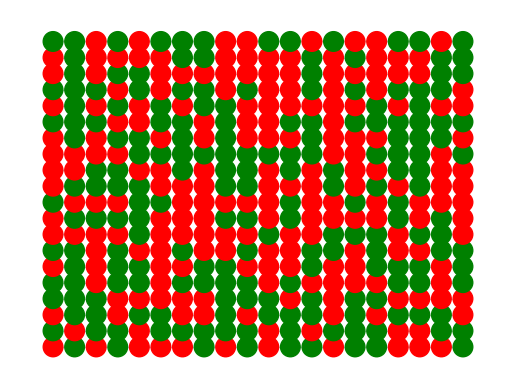

In [33]:
state = {node: random.randint(0, 1) for node in G.nodes()}
draw_state(G, state)

### Задание № 2
Реализовать на построенном графе клеточный автомат «Игра «Жизнь».

#### Алгоритм игры
- Если клетка пуста и рядом с ней ровно три живые клетки, она становится живой.
- Если клетка живая и рядом с ней меньше двух или больше трех живых клеток, она умирает.
- Если клетка живая и рядом с ней две или три живые клетки, она остается живой.

In [35]:
def update_state(G, state):
    new_state = state.copy()
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        n_alive = sum(state[neighbor] for neighbor in neighbors)
        if state[node] == 1:
            if n_alive < 2 or n_alive > 3:
                new_state[node] = 0
        else:
            if n_alive == 3:
                new_state[node] = 1
    return new_state

### Задания № 3-4
Визуализировать клеточный автомат на графе.

Построить графики изменения количества окрашенных вершин (каждого цвета).

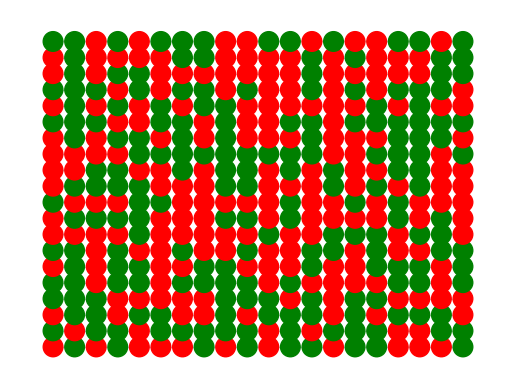

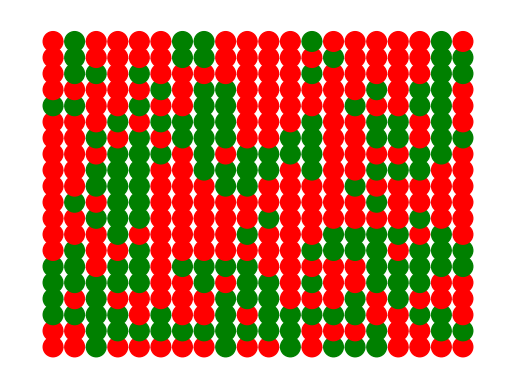

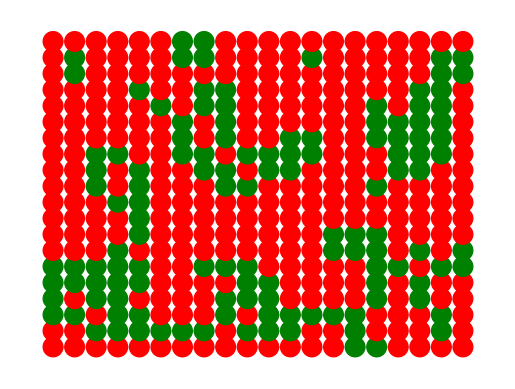

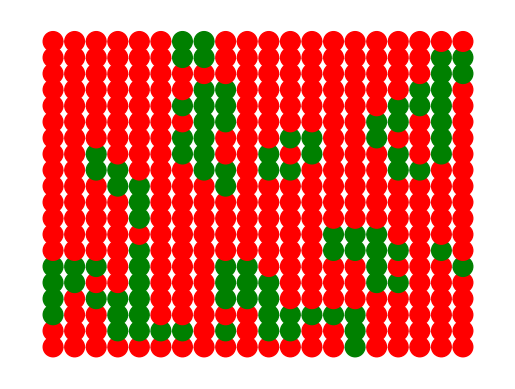

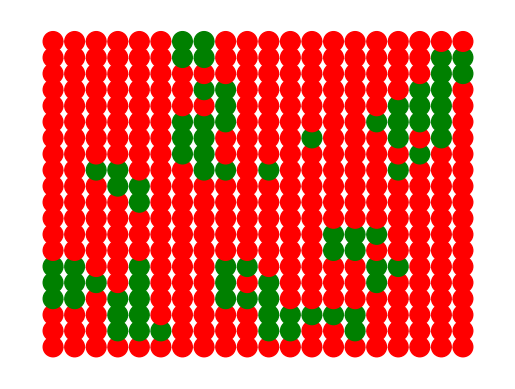

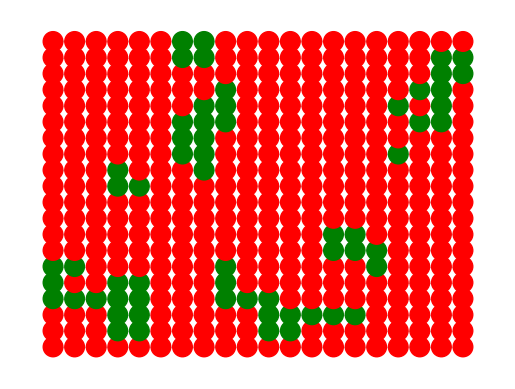

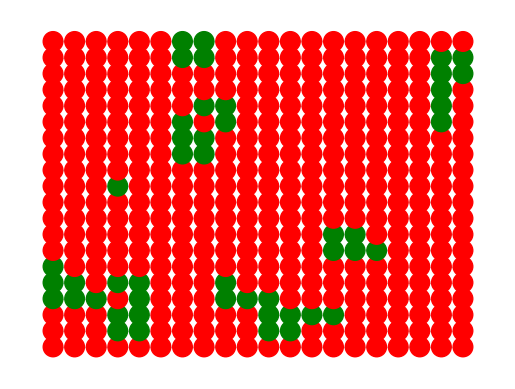

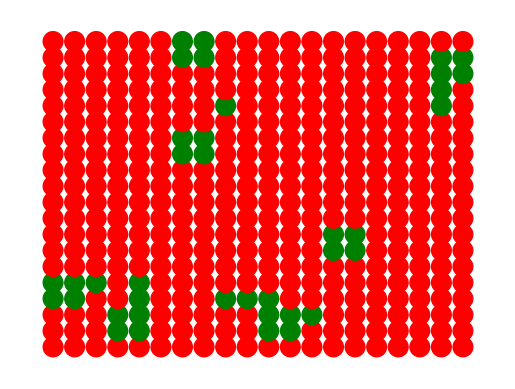

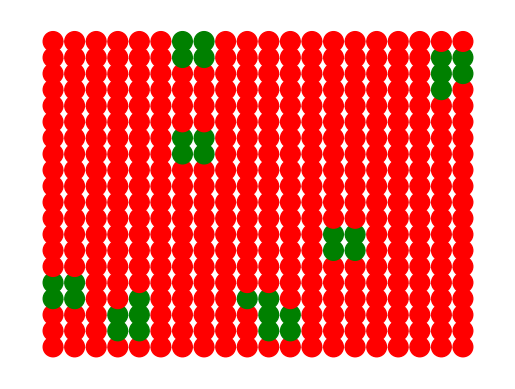

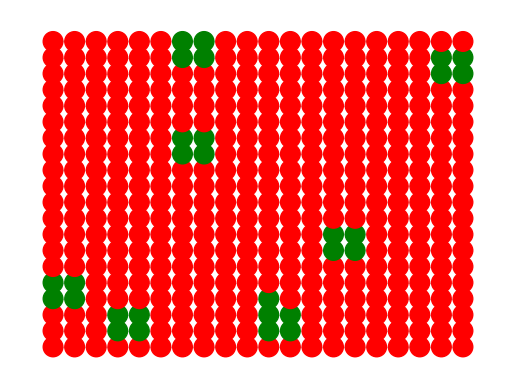

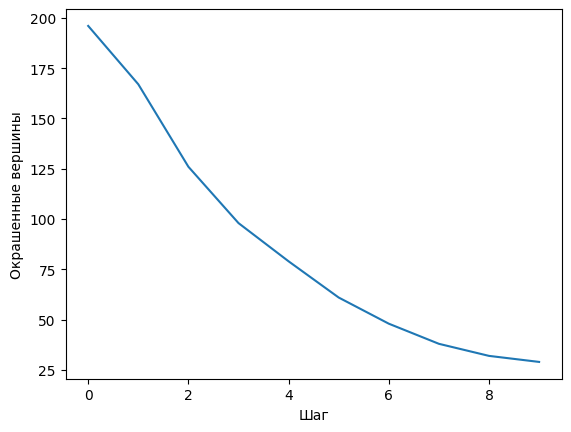

In [36]:
def count_colored_nodes(G, state):
    return sum(state[node] for node in G.nodes())

def plot_colored_nodes(counts):
    plt.plot(counts)
    plt.xlabel('Шаг')
    plt.ylabel('Окрашенные вершины')
    plt.show()

counts = []

for i in range(10):
    draw_state(G, state)
    counts.append(count_colored_nodes(G, state))
    state = update_state(G, state)

plot_colored_nodes(counts)

По промежуточным результатам видно, что на 6 шаге изменения в клеточном автомате достигают минимального значения.

#### Пример заполнения графа, который заполнен значениями 0, 1, 0, 1...

{(0, 0): 0, (0, 1): 1, (0, 2): 0, (0, 3): 1, (0, 4): 0, (0, 5): 1, (0, 6): 0, (0, 7): 1, (0, 8): 0, (0, 9): 1, (0, 10): 0, (0, 11): 1, (0, 12): 0, (0, 13): 1, (0, 14): 0, (0, 15): 1, (0, 16): 0, (0, 17): 1, (0, 18): 0, (0, 19): 1, (1, 0): 0, (1, 1): 1, (1, 2): 0, (1, 3): 1, (1, 4): 0, (1, 5): 1, (1, 6): 0, (1, 7): 1, (1, 8): 0, (1, 9): 1, (1, 10): 0, (1, 11): 1, (1, 12): 0, (1, 13): 1, (1, 14): 0, (1, 15): 1, (1, 16): 0, (1, 17): 1, (1, 18): 0, (1, 19): 1, (2, 0): 0, (2, 1): 1, (2, 2): 0, (2, 3): 1, (2, 4): 0, (2, 5): 1, (2, 6): 0, (2, 7): 1, (2, 8): 0, (2, 9): 1, (2, 10): 0, (2, 11): 1, (2, 12): 0, (2, 13): 1, (2, 14): 0, (2, 15): 1, (2, 16): 0, (2, 17): 1, (2, 18): 0, (2, 19): 1, (3, 0): 0, (3, 1): 1, (3, 2): 0, (3, 3): 1, (3, 4): 0, (3, 5): 1, (3, 6): 0, (3, 7): 1, (3, 8): 0, (3, 9): 1, (3, 10): 0, (3, 11): 1, (3, 12): 0, (3, 13): 1, (3, 14): 0, (3, 15): 1, (3, 16): 0, (3, 17): 1, (3, 18): 0, (3, 19): 1, (4, 0): 0, (4, 1): 1, (4, 2): 0, (4, 3): 1, (4, 4): 0, (4, 5): 1, (4, 6): 0, (4

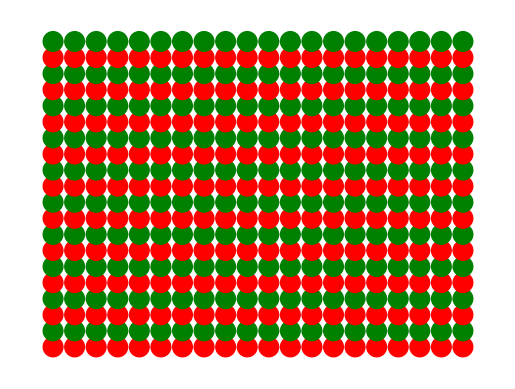

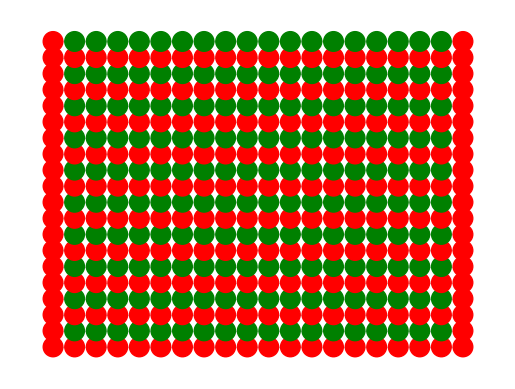

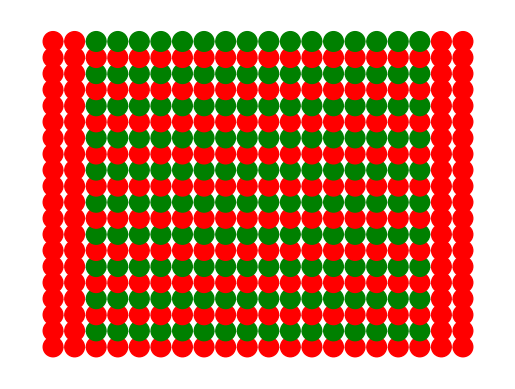

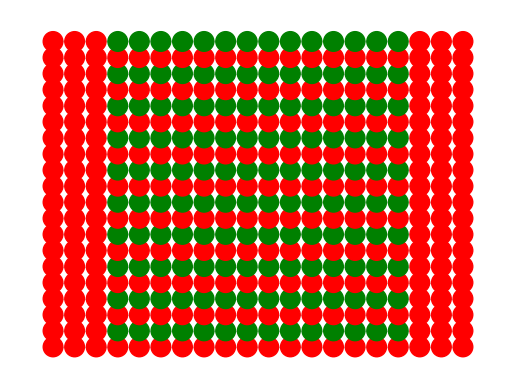

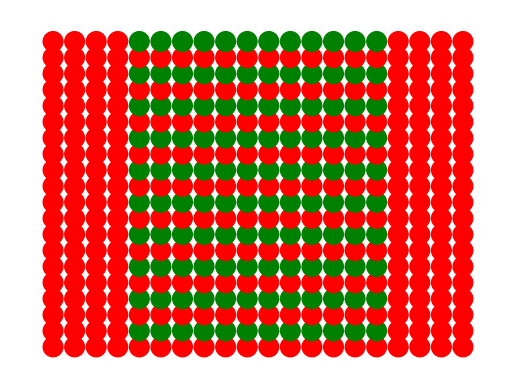

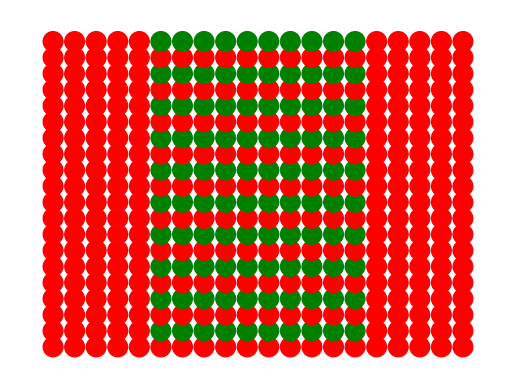

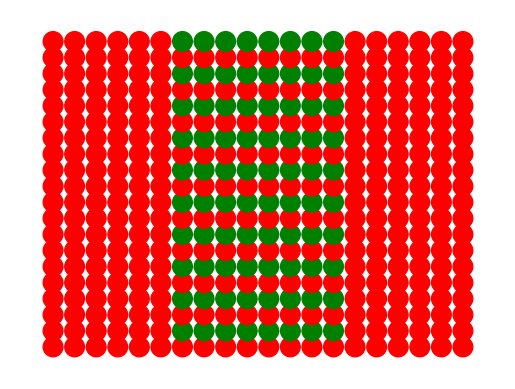

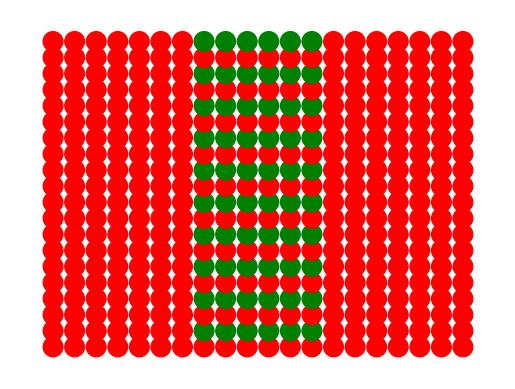

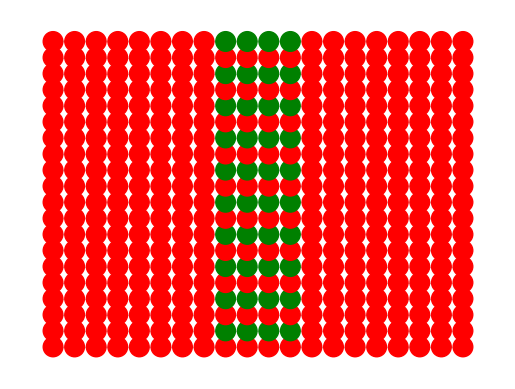

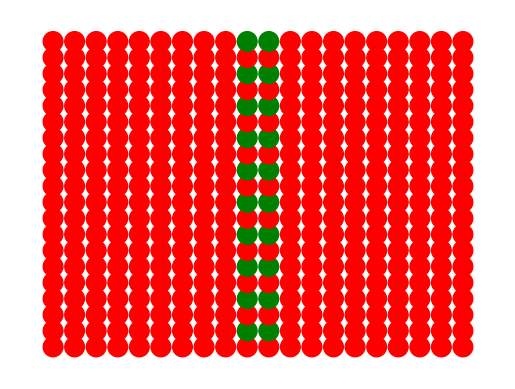

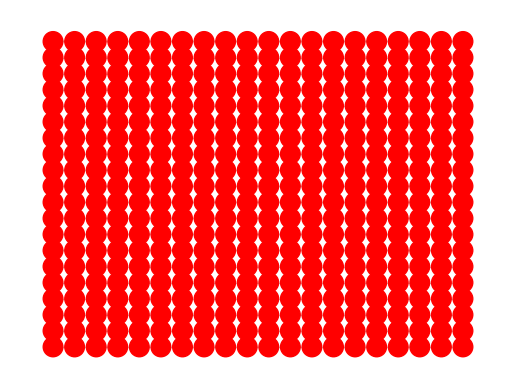

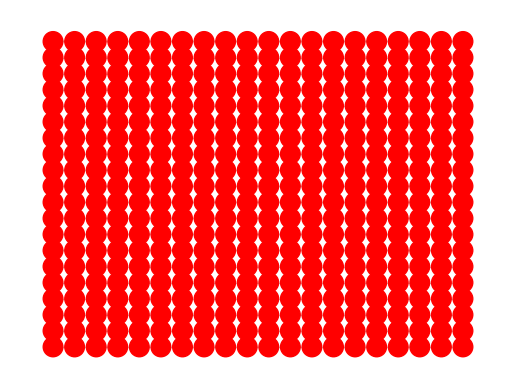

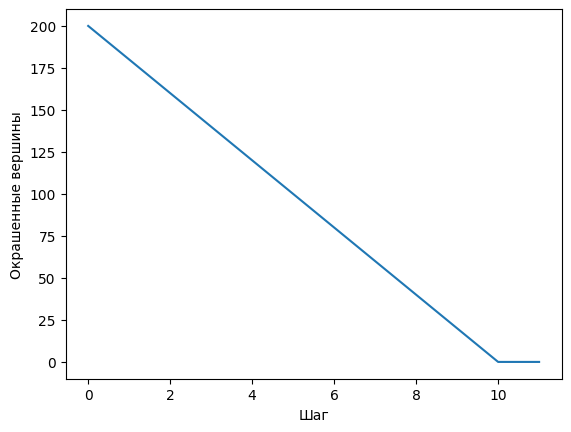

In [37]:
counts = []
state = {node: i % 2 for i, node in enumerate(G.nodes())}
print(state)

# state[(8,9)] = 1
# state[(9,9)] = 1
# state[(10,9)] = 1
# state[(9,8)] = 1
# state[(9,10)] = 1
# state[(9,11)] = 1
# state[(9,12)] = 1

for i in range(12):
    draw_state(G, state)
    counts.append(count_colored_nodes(G, state))
    state = update_state(G, state)
    # draw_state(G, state)

plot_colored_nodes(counts)

Промежуточные изменения в этом случае имеют обратный линейный закон развития